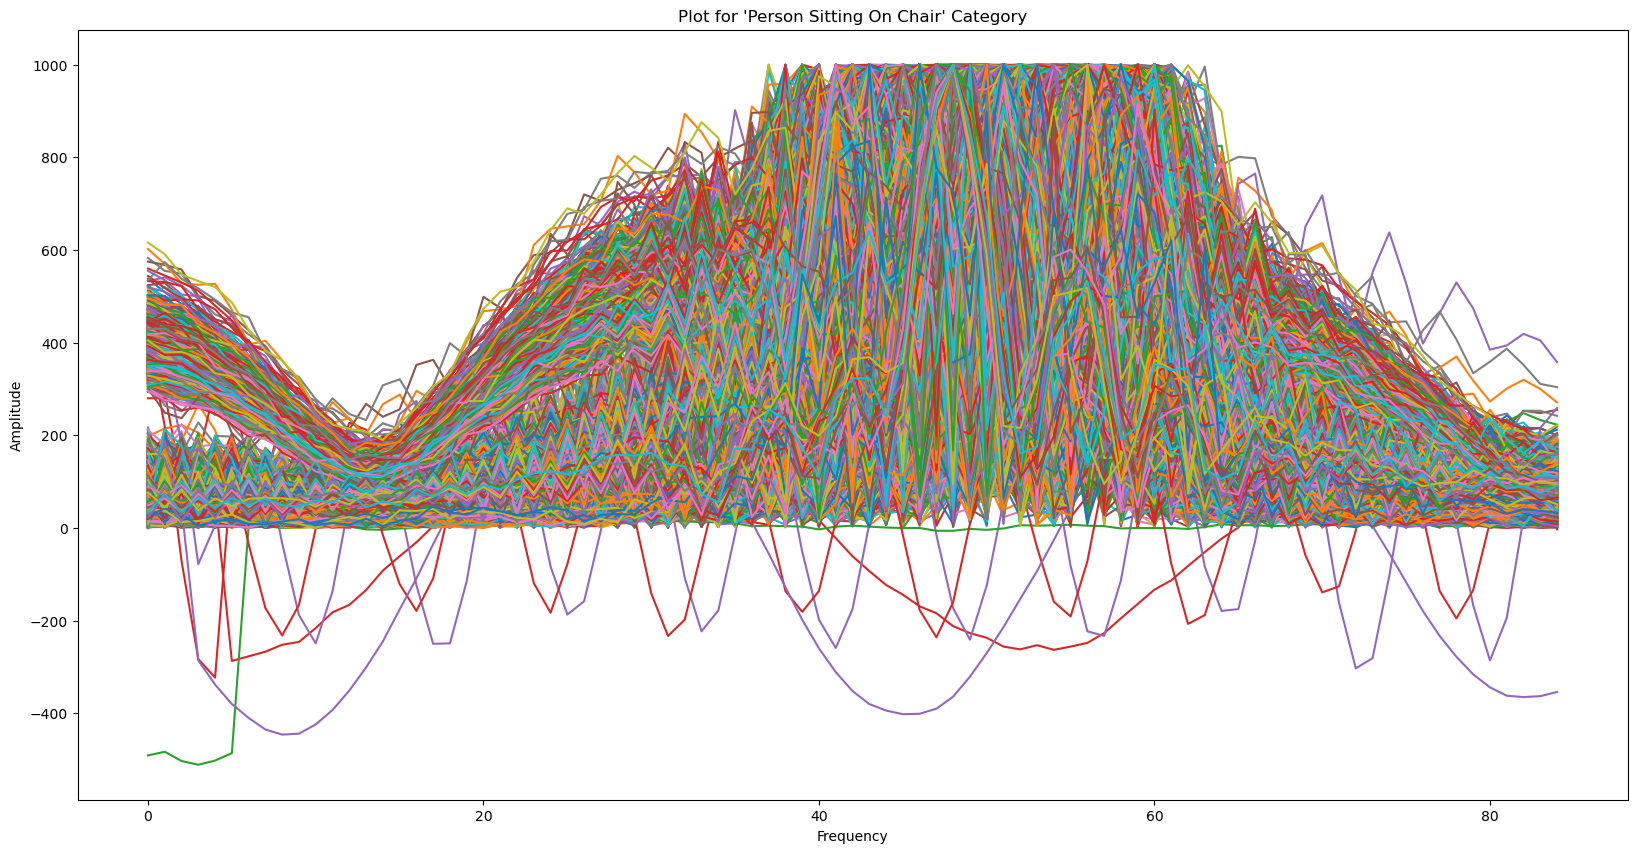

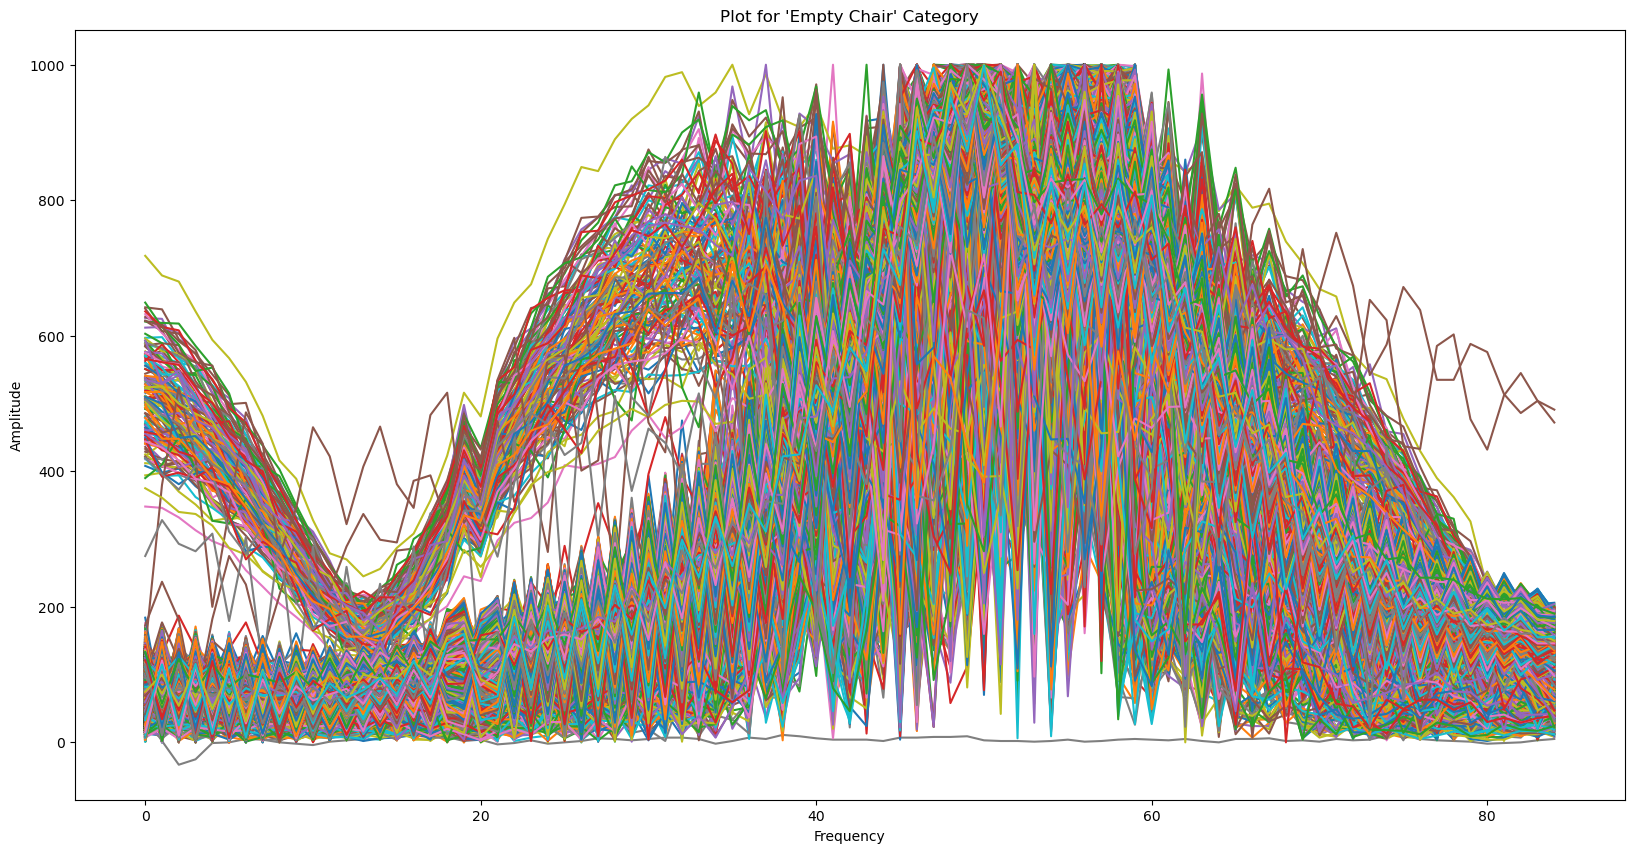

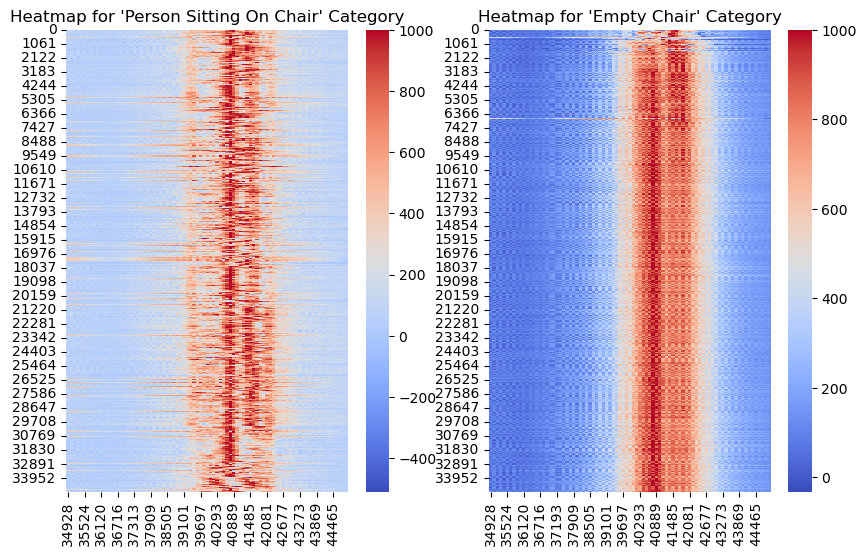

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df_person = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ8p0GyNMXdltCl8DiRCKwDjCkgk6ETNaA-2n5s1TD9tdkjxtGbdtlWcsOI12neVr_6EbIkOg7i9vun/pub?output=csv")  # Replace with the path to your "person sitting on chair" dataset
df_empty = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-zAJ8pKEY-dPqMVIRwvGSmcOQsz52Dt1FbCCANS_MLaAxWEd5qPTZjqQi53oEAZ8Th5Ife4ujKEwb/pub?output=csv")  # Replace with the path to your "empty chair" dataset

# Step 2: Plot sensor measurement values for a subset of rows
num_rows = 35000  # Number of rows to plot (adjust as needed)

plt.figure(figsize=(20, 10))
for i in range(num_rows):
    row_values = df_person.iloc[i, :].values
    plt.plot(row_values, label="Person Sitting On Chair")

plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Plot for 'Person Sitting On Chair' Category")
#plt.legend()
plt.show()

plt.figure(figsize=(20, 10))
for i in range(num_rows):
    row_values = df_empty.iloc[i, :].values
    plt.plot(row_values, label="Empty Chair")

plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Plot for 'Empty Chair' Category")
#plt.legend()
plt.show()

# Step 3: Generate heatmaps
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot heatmap for "Person Sitting On Chair" category
sns.heatmap(df_person.iloc[:num_rows, :], cmap="coolwarm", ax=axes[0])
axes[0].set_title("Heatmap for 'Person Sitting On Chair' Category")

# Plot heatmap for "Empty Chair" category
sns.heatmap(df_empty.iloc[:num_rows, :], cmap="coolwarm", ax=axes[1])
axes[1].set_title("Heatmap for 'Empty Chair' Category")

plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Import the datasets
df_person = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRKsEt3KvB7iGTZe12RQJjyirMbTzpRJerNrvBMucsCiRnsyhmJ4fiP0ZFpD9rbJvUF2-H-AAd7HDpK/pub?gid=833867582&single=true&output=csv")  # Replace with the path to your "person sitting on chair" dataset
df_empty = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTxLWnHw1-fUXQTrsd9iVHyFnNXD-CUO9f2LhAFfTL4VREw1kQYgVfLJvGt4ZwF4M1aFQRFtz1kMgNk/pub?gid=675087772&single=true&output=csv")  # Replace with the path to your "empty chair" dataset

df_person.shape

(35000, 85)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


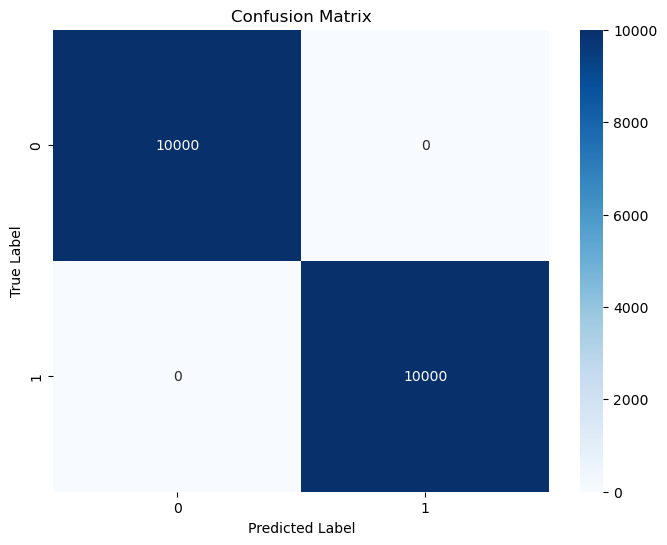

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Import the datasets
df_person = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRqvjx1RWBubIgaLAE4C_SeiKgciCgTXSxUBVvvUlKoSPGoQVGgDOoTJsi55suWtsS40_I9UmSHlVSv/pub?gid=1515861831&single=true&output=csv")  # Replace with the path to your "person sitting on chair" dataset
df_empty = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTTs14nApBUIcc6sTYHkrD1YXryyIJpck1-t3O1YpHjljuWQgxG8g1Itaqy_wjofjytdO4ZNZh7Ncnf/pub?gid=1713332773&single=true&output=csv")  # Replace with the path to your "empty chair" dataset

# Step 2: Combine the datasets
df_combined = pd.concat([df_person, df_empty], axis=0)  # Combine the datasets

# Step 3: Set the target variable
target_person = np.ones(len(df_person))  # Assign target value 1 for "person sitting on chair" dataset
target_empty = np.zeros(len(df_empty))  # Assign target value 0 for "empty chair" dataset
target_combined = np.concatenate([target_person, target_empty], axis=0)  # Combine the target values

# Step 4: Train the SVM model
svm_model_training = SVC(kernel='linear')
svm_model_training.fit(df_combined.values, target_combined)

# Step 5: Evaluate the model
predictions = svm_model_training.predict(df_combined.values)

accuracy = accuracy_score(target_combined, predictions)

precision = precision_score(target_combined, predictions)
recall = recall_score(target_combined, predictions)
f1 = f1_score(target_combined, predictions)

conf_matrix = confusion_matrix(target_combined, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Saving the Trained SVM Model

In [2]:
from sklearn.svm import SVC
import sklearn.externals
import joblib

# Step 4: Train the SVM model
svm_model_training = SVC(kernel='linear')
svm_model_training.fit(df_combined.values, target_combined)

# Save the trained model
joblib.dump(svm_model_training, "svm_model.pkl")


['svm_model.pkl']

### Loading new & unseen datasets to Test the trained SVM model

Evaluation Metrics - Combined Data:
Accuracy: 0.9999
Precision: 1.0
Recall: 0.9998
F1 Score: 0.9998999899989999



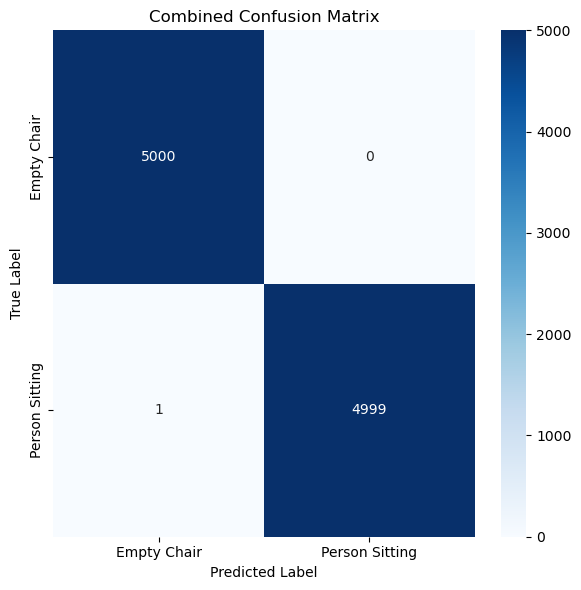

In [3]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Step 1: Load the unseen datasets
df_person_unseen = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vS95cifKe_yVECJdX01oljINY4hDo7_WGCI1bUu0JpHrzFTSxoEv7K8O_ZYYnFVRNhT2exPbNxtGE_O/pub?gid=487970136&single=true&output=csv")  # Replace with the path to your unseen "Person Sitting" dataset
df_empty_unseen = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vS983pobYPdHaES7Zr0qGCo08zB7UFDUx1dwHsoTfLIYb65hLXAnzAkqBz3Ep2bPR9Y6yiLObjovmPv/pub?gid=1779822102&single=true&output=csv")  # Replace with the path to your unseen "Empty Chair" dataset

# Step 2: Prepare the unseen datasets for evaluation
X_person_unseen = df_person_unseen.values
X_empty_unseen = df_empty_unseen.values

# Step 3: Load the trained SVM model
svm_model = SVC(kernel='linear')
svm_model = joblib.load("svm_model.pkl")  # Replace with the path to your trained SVM model file

# Step 4: Predict labels for the unseen datasets
y_person_unseen_pred = svm_model.predict(X_person_unseen)
y_empty_unseen_pred = svm_model.predict(X_empty_unseen)

# Step 5: Create true labels for the unseen datasets
y_person_unseen_true = np.ones(len(df_person_unseen))  # Assuming all instances in "Person Sitting" dataset are positive
y_empty_unseen_true = np.zeros(len(df_empty_unseen))  # Assuming all instances in "Empty Chair" dataset are negative

# Step 6: Combine the true labels and predicted labels for both categories
y_true_combined = np.concatenate((y_person_unseen_true, y_empty_unseen_true))
y_pred_combined = np.concatenate((y_person_unseen_pred, y_empty_unseen_pred))

# Step 7: Create a confusion matrix for the combined data
conf_matrix_combined = confusion_matrix(y_true_combined, y_pred_combined)

# Step 8: Calculate evaluation metrics for the combined data
accuracy = accuracy_score(y_true_combined, y_pred_combined)
precision = precision_score(y_true_combined, y_pred_combined)
recall = recall_score(y_true_combined, y_pred_combined)
f1 = f1_score(y_true_combined, y_pred_combined)

# Step 9: Print the evaluation metrics
print("Evaluation Metrics - Combined Data:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print()

# Step 10: Plot the combined confusion matrix with labels
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_combined, annot=True, fmt="d", cmap="Blues")
plt.title("Combined Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0.5, 1.5], ["Empty Chair", "Person Sitting"])
plt.yticks([0.5, 1.5], ["Empty Chair", "Person Sitting"])
plt.tight_layout()
plt.show()
